<a href="https://colab.research.google.com/github/rd9437/Predict_Energy_Consumption/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
train_path = "/content/df_test.csv"
test_path = "/content/df_train.csv"

In [21]:
df_train = pd.read_csv(train_path, parse_dates=["date"])
df_test = pd.read_csv(test_path, parse_dates=["date"])

In [22]:
df = df_train.copy()

In [23]:
df = pd.get_dummies(df, columns=["day_in_week"], drop_first=True)

In [24]:
target = "power_consumption"
features = df.drop(columns=["date", target]).columns

X = df[features]
y = df[target]

In [25]:
split_index = int(len(df) * 0.8)
X_train, X_val = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_val = y.iloc[:split_index], y.iloc[split_index:]

In [26]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
y_pred_rf = model_rf.predict(X_val)


In [28]:
mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))

print("Validation MAE (Random Forest):", mae_rf)
print("Validation RMSE (Random Forest):", rmse_rf)

Validation MAE (Random Forest): 344.90081458333316
Validation RMSE (Random Forest): 435.6896111026263


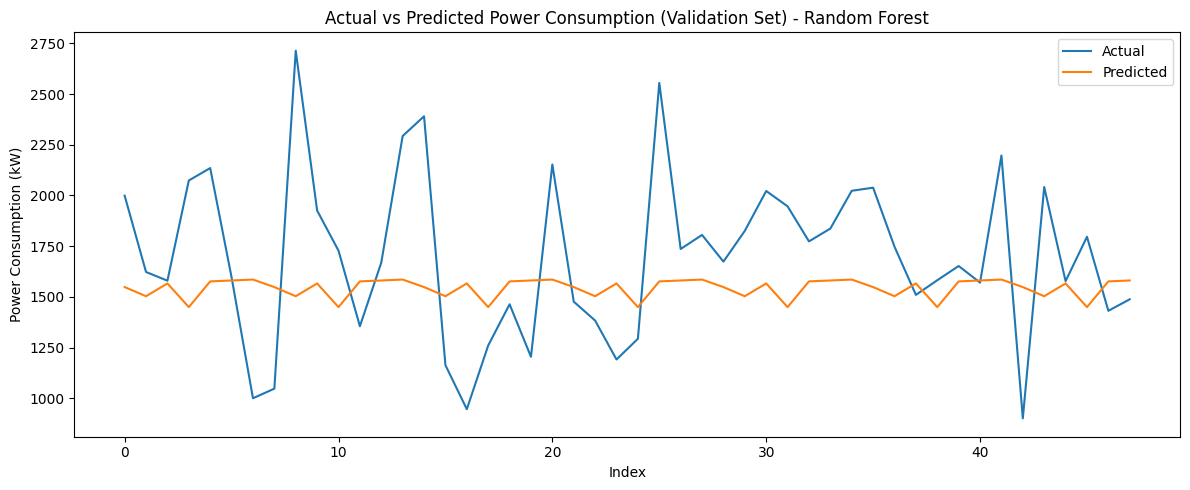

In [29]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(len(y_val)), y=y_val.values, label="Actual")
sns.lineplot(x=range(len(y_val)), y=y_pred_rf, label="Predicted")
plt.title("Actual vs Predicted Power Consumption (Validation Set) - Random Forest")
plt.xlabel("Index")
plt.ylabel("Power Consumption (kW)")
plt.legend()
plt.tight_layout()
plt.show()

Testing dataset

In [30]:
df_test = pd.get_dummies(df_test, columns=["day_in_week"], drop_first=True)

In [31]:
for col in features:
    if col not in df_test.columns:
        df_test[col] = 0

In [32]:
X_test = df_test[features]
y_test = df_test["power_consumption"]

In [33]:
y_test_pred_rf = model_rf.predict(X_test)

In [34]:
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

In [35]:
print("Test MAE (Random Forest):", mae_test_rf)
print("Test RMSE (Random Forest):", rmse_test_rf)

Test MAE (Random Forest): 433.46723146422596
Test RMSE (Random Forest): 591.2211772851417


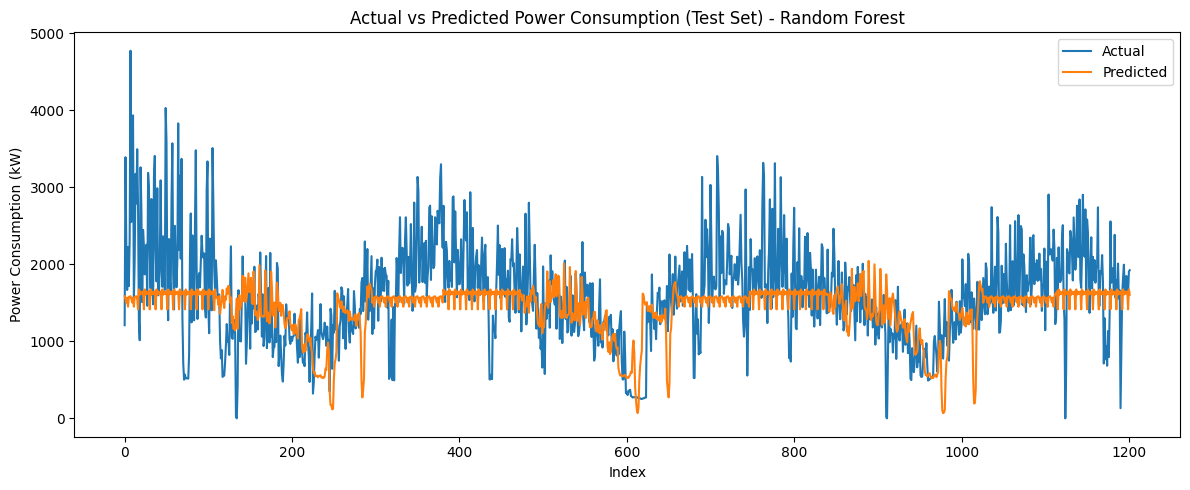

In [36]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(len(y_test)), y=y_test.values, label="Actual")
sns.lineplot(x=range(len(y_test)), y=y_test_pred_rf, label="Predicted")
plt.title("Actual vs Predicted Power Consumption (Test Set) - Random Forest")
plt.xlabel("Index")
plt.ylabel("Power Consumption (kW)")
plt.legend()
plt.tight_layout()
plt.show()